In [12]:

import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
#Sperate small vs big busineses into different folders
small_businesses_files = [
        "Customer PNL Form.xlsx - ABC Company.xlsx",
        "Customer PNL Form.xlsx - BCD Company.xlsx",
        "Customer PNL Form.xlsx - CDE Company.xlsx",
        "Customer PNL Form.xlsx - DEF Company.xlsx",
        "Customer PNL Form.xlsx - EFG Company.xlsx",
        "Customer PNL Form.xlsx - FGH Company.xlsx",
        "Customer PNL Form.xlsx - GHI Company.xlsx",
        "Customer PNL Form.xlsx - HIJ Company.xlsx",
        "Customer PNL Form.xlsx - IJK Company.xlsx",
        "Customer PNL Form.xlsx - JKL Company.xlsx",
        "Customer PNL Form.xlsx - KLM Company.xlsx",
        "Customer PNL Form.xlsx - LMN Company.xlsx"
]
big_businesses_files = [ 
        "Customer PNL Form.xlsx - MNO Company.xlsx",
        "Customer PNL Form.xlsx - NOP Company.xlsx",
        "Customer PNL Form.xlsx - OPQ Company.xlsx",
        "Customer PNL Form.xlsx - PQR Company.xlsx",
        "Customer PNL Form.xlsx - QRS Company.xlsx",
        "Customer PNL Form.xlsx - RST Company.xlsx",
        "Customer PNL Form.xlsx - STU Company.xlsx",
        "Customer PNL Form.xlsx - TUV Company.xlsx",
        "Customer PNL Form.xlsx - UVW Company.xlsx",
        "Customer PNL Form.xlsx - VWX Company.xlsx",
        "Customer PNL Form.xlsx - WXY Company.xlsx",
        "Customer PNL Form.xlsx - XYZ Company.xlsx" 
]       

# small_business_directory_path = '/Users/tenzinuden/Desktop/Project_D/Small_Customer_PNL_Forms '
# big_business_directory_path = '/Users/tenzinuden/Desktop/Project_D/Big_Customer_PNL_Forms '

directory_path = '/Users/tenzinuden/Desktop/Project_D/Customer_PNL_Forms'

small_businesses_list = []
for file in small_businesses_files:
    small_businesses_list.append(pd.read_excel(directory_path+'/'+file))

big_businesses_list = []
for file in big_businesses_files:
    big_businesses_list.append(pd.read_excel(directory_path+'/'+file))   

In [3]:

small_business_df = pd.read_excel('small_business_tracking_report.xlsx')
big_business_df = pd.read_excel('big_business_tracking_report.xlsx')


In [4]:
 
current_columns_s = small_business_df.columns.tolist()
current_columns_b = big_business_df.columns.tolist()

current_columns_s[12] = "return_on_sales_current_period"
current_columns_b[14]="return_on_sales_current_period"

small_business_df.columns= current_columns_s
big_business_df.columns= current_columns_b

small_business_df
big_business_df


,company_name,date_filed,associate_initials,headquarters_location,current_period_total_sales_revenue,sales_revenue_change_from_budget,current_period_total_cost_of_sales,cost_of_sales_change_from_budget,ratio_revenue_to_cost,current_period_total_operating_expenses,ratio_revenue_to_total_expenses,current_period_total_taxes,current_period_net_profit,gross_margin,return_on_sales_current_period,entered_in_online_tracker,current_period_benefits_admin_amount_paid
0,MNO Company,2024-05-30,P,"Buffalo, NY",6119224,0.112908,2118206.0,-0.177728,2.888871,1326124,4.614368,1006011.82,1668882.18,0.653844,0.272728,Y,55600
1,NOP Company,2024-05-30,P,NaN,6244521,0.069779,NaN,NaN,NaN,1168030,5.346199,1809981.26,3266509.74,1.000000,0.523100,Y,44791
2,OPQ Company,2024-05-30,P,"Charlotte, NC",5324190,-0.067918,2376571.0,-0.105708,2.240282,1212823,4.389915,678123.16,1056672.84,NaN,0.198466,Y,55032
3,PQR Company,2024-05-30,P,"Richmond, VA",6154125,-0.011914,2108546.0,-0.107982,2.918658,1039828,5.918407,1094598.39,1911152.61,0.657377,0.310548,Y,51893
4,QRS Company,2024-05-30,P,"Jackson, MS",6896388,0.225383,2438595.0,-0.171214,2.828017,1329651,5.186615,1161450.57,1966691.43,0.646395,0.285177,Y,62997
5,RST Company,2024-05-30,P,"Austin, TX",5621338,-0.005751,2842889.0,0.043828,1.977333,1412891,3.978607,475926.57,889631.43,0.494268,0.158260,Y,61917
6,STU Company,2024-05-30,P,"New York, NY",5813600,0.004722,2503326.0,-0.125657,2.322350,1034186,5.621426,846095.64,1429992.36,0.569402,0.245974,Y,35544
7,TUV Company,2024-05-30,P,"Philadelphia, PA",5935834,0.088344,2459058.0,-0.179749,2.413865,1443029,4.113454,798677.48,1235069.52,0.585727,0.208070,Y,61540
8,UVW Company,2024-05-30,P,"Frederick, MD",6422572,0.064219,2673643.0,0.140132,2.402180,1172213,5.479014,961428.73,1615287.27,0.583711,0.251502,Y,38925
9,VWX Company,2024-05-30,P,"Milwaukee, WI",6313028,0.044278,2410206.0,0.007658,2.619290,1047154,6.028748,1044784.72,1810883.28,0.618217,0.286849,Y,38427


In [5]:
for i in range(len(small_businesses_list)):    
    
    gross_profit_prior = small_businesses_list[i].iloc[22,2]
    gross_profit_current = small_businesses_list[i].iloc[22,4]
    return_on_sales_prior_period = small_businesses_list[i].iloc[62,2]/small_businesses_list[i].iloc[12,2]

    small_business_df.at[i,"gross_profit_prior_period"] = gross_profit_prior
    small_business_df.at[i,"gross_profit_current_period"] = gross_profit_current
    small_business_df.at[i,"return_on_sales_prior_period"] = return_on_sales_prior_period
    

small_business_df

,company_name,date_filed,associate_initials,current_period_total_sales_revenue,sales_revenue_change_from_budget,current_period_total_cost_of_sales,cost_of_sales_change_from_budget,ratio_revenue_to_cost,current_period_total_operating_expenses,ratio_revenue_to_total_expenses,current_period_total_taxes,gross_margin,return_on_sales_current_period,entered_in_online_tracker,company_hq_location,gross_profit_prior_period,gross_profit_current_period,return_on_sales_prior_period
0,ABC Company,2024-05-30,P,430735,-0.090432,190116,0.032751,2.265643,126073,3.416552,36702.51,0.558624,0.180722,Y,"San Diego, CA",264688.0,240619.0,0.189347
1,BCE Company,2024-05-30,P,453716,NaN,202650,NaN,2.238914,122867,3.692741,39402.69,0.553355,0.195709,Y,"Phoenix, AZ",343930.0,251066.0,0.351385
2,CDE Company,2024-05-30,P,420635,-0.159150,180038,-0.015643,2.336368,108545,3.875213,0.00,0.571985,0.313935,Y,"New Orleans, LA",305943.0,240597.0,0.392003
3,DEF Company,2024-05-30,P,493781,-0.071589,182055,0.069729,2.712263,118813,4.155951,53926.37,0.631304,0.281474,Y,"Wilmington, DE",289011.0,311726.0,0.295159
4,EFG Company,2024-05-30,P,406433,0.021720,178280,-0.093917,2.279745,128839,3.154581,33415.15,0.561355,0.162140,Y,"Indianapolis, IN",323324.0,228153.0,0.281240
5,FGH Company,2024-05-30,P,554071,0.279849,179247,-0.103267,3.091103,96075,5.767067,71728.07,0.676491,0.373636,Y,"Cherry Hill, NJ",314674.0,374824.0,0.336952
6,GHI Company,2024-05-30,P,480321,0.076323,194390,-0.057695,2.470914,89277,5.380120,52169.96,0.595291,0.300807,Y,"Columbus, OH",217437.0,285931.0,0.169081
7,HIJ Company,2024-05-30,P,363077,-0.272819,185957,-0.015606,1.952478,108924,3.333306,24406.62,0.487830,0.120606,Y,"Salt Lake City, UT",311632.0,177120.0,0.323636
8,IJK Company,2024-05-30,P,470974,0.035133,196532,0.082964,2.396424,97381,4.836405,48353.60,0.582712,0.273279,Y,"Seattle, WA",330724.0,274442.0,0.336258
9,JKL Company,2024-05-30,P,422384,-0.031098,196433,0.026097,2.150270,97327,4.339844,30988.35,0.534942,0.231154,Y,"Salem, OR",269735.0,225951.0,0.307366


In [6]:
for i in range(len(big_businesses_list)):
    
    gross_profit_prior = big_businesses_list[i].iloc[22,2]
    gross_profit_current = big_businesses_list[i].iloc[22,4]
    return_on_sales_prior_period = big_businesses_list[i].iloc[62,2]/big_businesses_list[i].iloc[12,2]


    big_business_df.at[i,"gross_profit_prior_period"] = gross_profit_prior
    big_business_df.at[i,"gross_profit_current_period"] = gross_profit_current
    big_business_df.at[i,"return_on_sales_prior_period"] = return_on_sales_prior_period
    
big_business_df

,company_name,date_filed,associate_initials,headquarters_location,current_period_total_sales_revenue,sales_revenue_change_from_budget,current_period_total_cost_of_sales,cost_of_sales_change_from_budget,ratio_revenue_to_cost,current_period_total_operating_expenses,ratio_revenue_to_total_expenses,current_period_total_taxes,current_period_net_profit,gross_margin,return_on_sales_current_period,entered_in_online_tracker,current_period_benefits_admin_amount_paid,gross_profit_prior_period,gross_profit_current_period,return_on_sales_prior_period
0,MNO Company,2024-05-30,P,"Buffalo, NY",6119224,0.112908,2118206.0,-0.177728,2.888871,1326124,4.614368,1006011.82,1668882.18,0.653844,0.272728,Y,55600,4470874.0,4001018.0,0.309751
1,NOP Company,2024-05-30,P,NaN,6244521,0.069779,NaN,NaN,NaN,1168030,5.346199,1809981.26,3266509.74,1.000000,0.523100,Y,44791,4125446.0,6244521.0,0.281884
2,OPQ Company,2024-05-30,P,"Charlotte, NC",5324190,-0.067918,2376571.0,-0.105708,2.240282,1212823,4.389915,678123.16,1056672.84,NaN,0.198466,Y,55032,3240657.0,2947619.0,0.235620
3,PQR Company,2024-05-30,P,"Richmond, VA",6154125,-0.011914,2108546.0,-0.107982,2.918658,1039828,5.918407,1094598.39,1911152.61,0.657377,0.310548,Y,51893,4167593.0,4045579.0,0.267646
4,QRS Company,2024-05-30,P,"Jackson, MS",6896388,0.225383,2438595.0,-0.171214,2.828017,1329651,5.186615,1161450.57,1966691.43,0.646395,0.285177,Y,62997,3634492.0,4457793.0,0.238102
5,RST Company,2024-05-30,P,"Austin, TX",5621338,-0.005751,2842889.0,0.043828,1.977333,1412891,3.978607,475926.57,889631.43,0.494268,0.158260,Y,61917,4252753.0,2778449.0,0.294118
6,STU Company,2024-05-30,P,"New York, NY",5813600,0.004722,2503326.0,-0.125657,2.322350,1034186,5.621426,846095.64,1429992.36,0.569402,0.245974,Y,35544,4577936.0,3310274.0,0.301466
7,TUV Company,2024-05-30,P,"Philadelphia, PA",5935834,0.088344,2459058.0,-0.179749,2.413865,1443029,4.113454,798677.48,1235069.52,0.585727,0.208070,Y,61540,4440009.0,3476776.0,0.267644
8,UVW Company,2024-05-30,P,"Frederick, MD",6422572,0.064219,2673643.0,0.140132,2.402180,1172213,5.479014,961428.73,1615287.27,0.583711,0.251502,Y,38925,4234715.0,3748929.0,0.280121
9,VWX Company,2024-05-30,P,"Milwaukee, WI",6313028,0.044278,2410206.0,0.007658,2.619290,1047154,6.028748,1044784.72,1810883.28,0.618217,0.286849,Y,38427,3719894.0,3902822.0,0.224134


In [7]:

centralised_tracking_report_df = pd.concat([small_business_df,big_business_df])

centralised_tracking_report_df['headquarters_location'] = centralised_tracking_report_df['headquarters_location'].fillna(centralised_tracking_report_df['company_hq_location'])
centralised_tracking_report_df = centralised_tracking_report_df.drop(columns=["company_hq_location"])

centralised_tracking_report_df


,company_name,date_filed,associate_initials,current_period_total_sales_revenue,sales_revenue_change_from_budget,current_period_total_cost_of_sales,cost_of_sales_change_from_budget,ratio_revenue_to_cost,current_period_total_operating_expenses,ratio_revenue_to_total_expenses,current_period_total_taxes,gross_margin,return_on_sales_current_period,entered_in_online_tracker,gross_profit_prior_period,gross_profit_current_period,return_on_sales_prior_period,headquarters_location,current_period_net_profit,current_period_benefits_admin_amount_paid
0,ABC Company,2024-05-30,P,430735,-0.090432,190116.0,0.032751,2.265643,126073,3.416552,36702.51,0.558624,0.180722,Y,264688.0,240619.0,0.189347,"San Diego, CA",NaN,NaN
1,BCE Company,2024-05-30,P,453716,NaN,202650.0,NaN,2.238914,122867,3.692741,39402.69,0.553355,0.195709,Y,343930.0,251066.0,0.351385,"Phoenix, AZ",NaN,NaN
2,CDE Company,2024-05-30,P,420635,-0.159150,180038.0,-0.015643,2.336368,108545,3.875213,0.00,0.571985,0.313935,Y,305943.0,240597.0,0.392003,"New Orleans, LA",NaN,NaN
3,DEF Company,2024-05-30,P,493781,-0.071589,182055.0,0.069729,2.712263,118813,4.155951,53926.37,0.631304,0.281474,Y,289011.0,311726.0,0.295159,"Wilmington, DE",NaN,NaN
4,EFG Company,2024-05-30,P,406433,0.021720,178280.0,-0.093917,2.279745,128839,3.154581,33415.15,0.561355,0.162140,Y,323324.0,228153.0,0.281240,"Indianapolis, IN",NaN,NaN
5,FGH Company,2024-05-30,P,554071,0.279849,179247.0,-0.103267,3.091103,96075,5.767067,71728.07,0.676491,0.373636,Y,314674.0,374824.0,0.336952,"Cherry Hill, NJ",NaN,NaN
6,GHI Company,2024-05-30,P,480321,0.076323,194390.0,-0.057695,2.470914,89277,5.380120,52169.96,0.595291,0.300807,Y,217437.0,285931.0,0.169081,"Columbus, OH",NaN,NaN
7,HIJ Company,2024-05-30,P,363077,-0.272819,185957.0,-0.015606,1.952478,108924,3.333306,24406.62,0.487830,0.120606,Y,311632.0,177120.0,0.323636,"Salt Lake City, UT",NaN,NaN
8,IJK Company,2024-05-30,P,470974,0.035133,196532.0,0.082964,2.396424,97381,4.836405,48353.60,0.582712,0.273279,Y,330724.0,274442.0,0.336258,"Seattle, WA",NaN,NaN
9,JKL Company,2024-05-30,P,422384,-0.031098,196433.0,0.026097,2.150270,97327,4.339844,30988.35,0.534942,0.231154,Y,269735.0,225951.0,0.307366,"Salem, OR",NaN,NaN


In [8]:

# Connect to a database 
conn = sqlite3.connect('ship_keep_co.db')

# Create a cursor object
cursor = conn.cursor()

centralised_tracking_report_df.to_sql('Centralised_data', conn, if_exists='replace', index=False)  # 'replace' to drop table if exists

#save the changes
conn.commit()
# Query all data from 'return_on_sales' and 'gross_profits'

get_company_return_on_sales = "SELECT company_name,return_on_sales_prior_period, return_on_sales_current_period FROM Centralised_data ORDER BY return_on_sales_prior_period DESC, return_on_sales_current_period DESC LIMIT 10 "

get_company_gross_profits = "SELECT company_name, gross_profit_prior_period,gross_profit_current_period FROM Centralised_data ORDER BY gross_profit_prior_period DESC, gross_profit_current_period DESC LIMIT 10; "

return_on_sales = cursor.execute(get_company_return_on_sales).fetchall()

gross_profits = cursor.execute(get_company_gross_profits).fetchall()

#close the connection

conn.close()



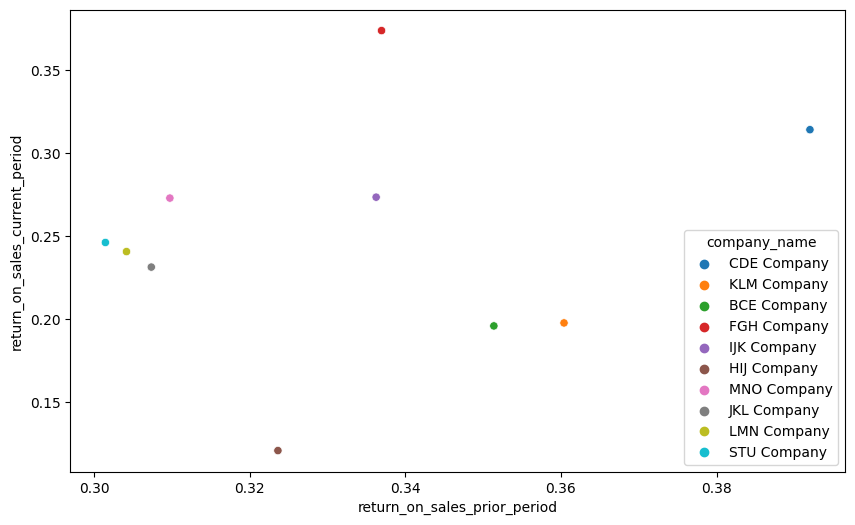

In [13]:

return_on_sales_df = pd.DataFrame(return_on_sales, columns=['company_name', 'return_on_sales_prior_period', 'return_on_sales_current_period'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=return_on_sales_df, x='return_on_sales_prior_period', y='return_on_sales_current_period', hue='company_name')
plt.show()

In [14]:
return_on_sales_df = pd.DataFrame(return_on_sales, columns=['company_name', 'return_on_sales_prior_period', 'return_on_sales_current_period'])

return_on_sales_df


,company_name,return_on_sales_prior_period,return_on_sales_current_period
0,CDE Company,0.392003,0.313935
1,KLM Company,0.360400,0.197507
2,BCE Company,0.351385,0.195709
3,FGH Company,0.336952,0.373636
4,IJK Company,0.336258,0.273279
5,HIJ Company,0.323636,0.120606
6,MNO Company,0.309751,0.272728
7,JKL Company,0.307366,0.231154
8,LMN Company,0.304177,0.240492
9,STU Company,0.301466,0.245974


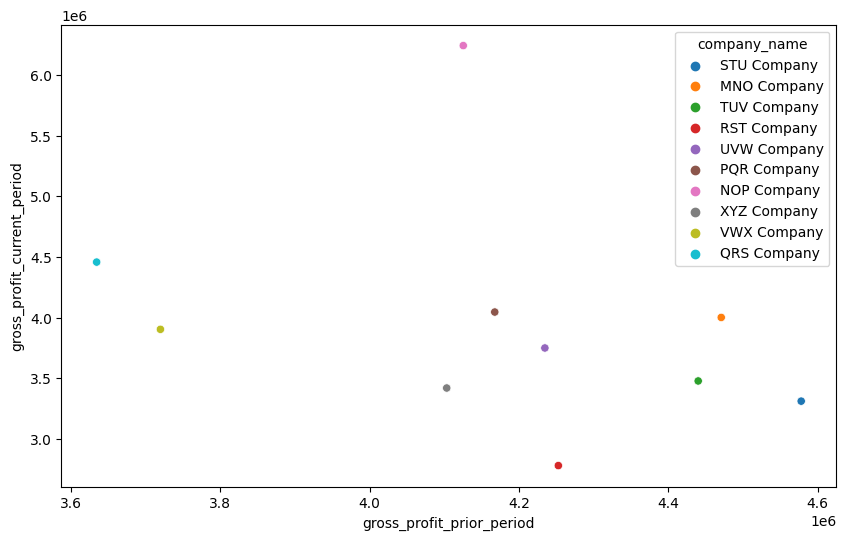

In [15]:

gross_profits_df = pd.DataFrame(gross_profits, columns=['company_name', 'gross_profit_prior_period', 'gross_profit_current_period'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gross_profits_df, x='gross_profit_prior_period', y='gross_profit_current_period', hue='company_name')
plt.show()

In [16]:
gross_profits_df = pd.DataFrame(gross_profits, columns=['company_name', 'gross_profit_prior_period', 'gross_profit_current_period'])

gross_profits_df


,company_name,gross_profit_prior_period,gross_profit_current_period
0,STU Company,4577936.0,3310274.0
1,MNO Company,4470874.0,4001018.0
2,TUV Company,4440009.0,3476776.0
3,RST Company,4252753.0,2778449.0
4,UVW Company,4234715.0,3748929.0
5,PQR Company,4167593.0,4045579.0
6,NOP Company,4125446.0,6244521.0
7,XYZ Company,4103262.0,3418585.0
8,VWX Company,3719894.0,3902822.0
9,QRS Company,3634492.0,4457793.0


Unit Testing

In [ ]:
# for file in small_businesses_files:
#     LMN_path = file[12] 
#     print(LMN_path)
# #     df = pd.read_excel(LMN_path)  # Load the file into a DataFrame

# #     LMN_gross_margin = df.iloc[1,2]
    
# #     if centralised_tracking_report_df.iloc[3,11] == LMN_gross_margin:
# #         print('Correct')